<a href="https://colab.research.google.com/github/meridethfrey/ResonanceCourse/blob/master/ExampleDataAnalysis/Electronic_Resonance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
The purpose of this notebook is to provide an example of the type of things I would like to see included in your lab report on electronic resonance.

***Note:***
*I want you to do your own work, so take this as guidance for what you can do, but try to do all the LaTeXing and coding yourself, with this as a guideline to check yourself. Debugging things is a key skill I want you to practice!*


##Theory
Ultimately, we want to see how the model for RLC circuits matches the experimental setup we created in the lab. If we apply the following AC voltage $V_\textrm{in}(t) = V_0 cos(\omega t)$ to a series RLC circuit and measure the output voltage over the resistor, we expect:
$$V_\textrm{out} = |V_R| \cos (\omega t - \delta)$$

where

$$ |V_R| = \frac{V_0 \gamma \omega}{\sqrt{\gamma^2 \omega^2 + (\omega^2 - \omega_0^2)^2}}$$

and

$$ \delta = \arctan \left( \frac{\omega^2 - \omega_0^2}{\gamma \omega} \right). $$

Here the resonance (angular) frequency is given by $\omega_0 = 1/ \sqrt{LC}$ and the resonance width is given by $\gamma = R/L$.

The quality factor is given by $Q = \omega_0 / \gamma$.

Note that we expect the output voltage to lead the input voltage for lower frequencies, be in phase with the input voltage at resonance, and lag behind the input voltage for higher frequencies.

#Experimental Method
Here you should explain the equipment used, experimental setup, and your experimental procedure. 

* Name for instrument providing input AC voltage -> function generator

* Name for instrument measuring the output voltage -> oscilloscope

* Would be good to provide a circuit diagram for the series RLC circuit we are using. Check out: https://www.circuit-diagram.org/editor/ 

* If you have an image on your computer that you want to include, you can try uploading your image to [Imgur](https://imgur.com/upload) (or some other image upload service) and then saving the link to the image (which appears when hovering over the image).

  * *When using the 'Insert image' button in the edit toolbar, you might need to add '.jpg' at the end of the image link to get image to  display correctly!*

![RLC Circuit Diagram](https://imgur.com/XlII6Ir.jpg)



**This circuit diagram isn't quite right, try to make yours match the picture of the setup I included below! The actual values for the resistor is 330 $\Omega$, inductance is ~ 1 mH, and capacitance is 0.1 $\mu$F.**

![This could be a caption](https://imgur.com/PLjcUjz.jpg)

You can acquire the relevant data by viewing the video I made found at https://www.youtube.com/watch?v=EAyRL0buOj8&feature=youtu.be .

* Consider what physical parameters you can measure from this data. (Be sure to read the caption in the YouTube video to know what is being shown!)
  * $V_0$ (the amplitude of the input voltage -> blue trace)
  * $f$ (the driven frequency and from that can get $\omega = 2 \pi f$)
  * amplitude of the output voltage -> yellow trace
  * an idea of how the phase of the output voltage compares with the input voltage as the frequency is changed.

* I am adjusting the frequency knob of the function generator during this film, what then is the independent variable, and what would the dependent variable be?
* How do you want to plot the data, and what should the fit function be?
* If you do a curve fit, what will be the input parameters, and what will be the fitting parameters?
* From the fit, what can we hope to learn about our circuit that we didn't know previously? 




#Data Analysis
Here you should input your data and do your analysis.

**Be sure to add an explanatory text cell explaining what is going on in each code cell you include!**
* Include plots of your data that are nicely labelled to display your data. (Do NOT print out arrays, no one wants to see that!)
* Include any curve fitting and be sure to show the fit parameters with uncertainties.

The cell below imports all the necessary libraries to use for data analysis.

In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize # we'll use this now
%matplotlib inline

The cell below defines the resonance model we will be using to fit the data.

In [0]:
def resonance_curve_model (omega, V0, omega0, gamma):
    '''
    Model function for resonance
    V0 = input voltage amplitude
    omega = angular frequency (radians per second)
    omega0 = natural resonant angular frequency
    gamma = damping coefficient
    '''
    return (V0*gamma*omega)/np.sqrt((omega**2 - omega0**2) **2+ (gamma*omega)**2)

Example code to fit the resonance curve from amplitude and frequency arrays.

best-fit parameters:  [0.29702053 3.41510228 0.13094235]
uncertainties:  [0.03430233 0.00662649 0.02702163]
V_0 =  0.2970205341732644  +/-  0.03430232612281574
omega0 =  3.4151022797052435  +/-  0.006626489946372562
gamma =  0.13094234708244462  +/-  0.027021634028611644


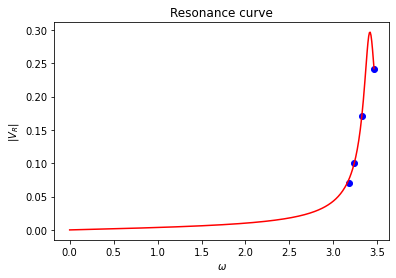

In [0]:
amplitude = np.array([0.101,0.242,0.07,0.171])
frequency = np.array([0.514,0.551,0.505,0.529])
omega = 2*np.pi*frequency 

guess = [0.3, 3.41, 0.13]
popt, pcov = scipy.optimize.curve_fit(resonance_curve_model, omega, amplitude, p0 = guess)
print('best-fit parameters: ', popt)

popt_uncertainties = np.sqrt(np.diag(pcov)) # get the diagonal elements then take sqrt
print('uncertainties: ', popt_uncertainties)

# calculate best fit model values
xfit = np.linspace(0, omega.max(), 400)
yfit = resonance_curve_model(xfit, popt[0], popt[1], popt[2])
#yfit = driven_model(xfit, guess[0],guess[1],guess[2])

# plot
plt.plot(omega, amplitude, 'bo')
plt.plot(xfit, yfit, 'r') # plot with a solid line
plt.xlabel('$\omega$')
plt.ylabel('$|V_R|$')
plt.title('Resonance curve')

print('V_0 = ', popt[0], ' +/- ', popt_uncertainties[0])
print('omega0 = ', popt[1], ' +/- ', popt_uncertainties[1])
print('gamma = ', popt[2], ' +/- ', popt_uncertainties[2])

# Discussion
This is where you talk about your results and how it compared to the theory.

* Was the model a good fit for the experimental data?
* If there are clear discrepancies with the theory, identify systematic errors resulting from assumptions that are the most likely explanations.
* What information can you get from the data that we didn't know before (e.g. Q factor, resonance frequency, good estimate for the value of the inductance).
* Any ideas for future experiments to improve upon your work?